In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
sns.set_context('paper')

import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_lg")

In [2]:
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Current google-chrome version is 83.0.4103
[WDM] - Get LATEST driver version for 83.0.4103


[WDM] - Driver [C:\Users\niran\.wdm\drivers\chromedriver\win32\83.0.4103.39\chromedriver.exe] found in cache


In [3]:
driver.get("https://economictimes.indiatimes.com/news/economy/indicators/indian-economy-in-deep-trouble-sp/articleshow/76643175.cms")

In [4]:
content = driver.page_source
soup = BeautifulSoup(content)

In [5]:
all_paras = soup.find_all('p')

In [6]:
text = ''
for p in all_paras:
    text += p.get_text()

In [7]:
print(text)

Indian economy ready for bounce back: PM ModiView: Eight steps to revive the Indian economyIndian economy is bound to revive soon: Piyush GoyalFitch projects Indian economy to contract 5% this fiscalIndian economy to contract in FY21, says Moody'sIndian economy to be in 'deep freeze': Moody’sTrending NowPopular CategoriesHot on WebIn Case you missed itET VerticalsMore from our networkOther useful LinksCopyright © 2020 Bennett, Coleman & Co. Ltd. All rights reserved. For reprint rights: Times Syndication ServiceLog In/Connect with:Will be displayedWill not be displayedWill be displayedLoadingPlease wait...


In [8]:
document = nlp(text)
displacy.render(document, style = "ent",jupyter = True)

In [9]:
entities=[(str(i), i.label_) for i in document.ents]
print(entities)
entities_df = pd.DataFrame(entities, columns =['Entity', 'Label'])
entities_df.head()

[('Indian', 'NORP'), ('Eight', 'CARDINAL'), ('Indian', 'NORP'), ('Piyush GoyalFitch', 'PERSON'), ('Indian', 'NORP'), ('5%', 'PERCENT'), ('FY21', 'ORG'), ('Moody’sTrending', 'CARDINAL'), ('NowPopular CategoriesHot', 'FAC'), ('2020', 'ORDINAL'), ('Bennett, Coleman &', 'ORG'), ('displayedLoadingPlease', 'PERSON')]


,Entity,Label
0,Indian,NORP
1,Eight,CARDINAL
2,Indian,NORP
3,Piyush GoyalFitch,PERSON
4,Indian,NORP


In [10]:
counts = entities_df['Label'].value_counts()
counts

NORP        3
ORG         2
CARDINAL    2
PERSON      2
FAC         1
PERCENT     1
ORDINAL     1
Name: Label, dtype: int64

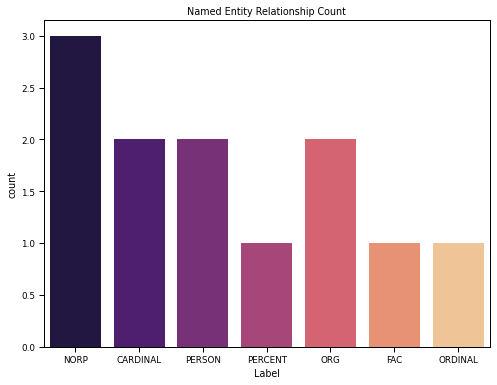

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x = 'Label', data = entities_df, palette = 'magma')
plt.title('Named Entity Relationship Count')
plt.show()